In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importation des packages nécessaires

In [6]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import time
from tabata.opset import Opset
from Cleaning import *
from Phase import *

Visualisation des données

In [7]:
input_file = "../Data/dfdr1000/Aircraft_01.h5"
ds = Opset(input_file)
ds.plot()

Création du fichier propre

In [11]:
output_file = "../Data/dfdr1000/Aircraft_01_c.h5"
clean_and_normalize_data(input_file,output_file)

Taille du df avant traitement : 1002
Vol exclu (altitude max ≤ 1000) : Vol #6
Vol exclu (altitude max ≤ 1000) : Vol #7
Vol exclu (altitude max ≤ 1000) : Vol #8
Vol exclu (altitude max ≤ 1000) : Vol #9
Vol exclu (faux atterrissage détecté) : Vol #10
Vol exclu (faux atterrissage détecté) : Vol #98
Vol exclu (faux atterrissage détecté) : Vol #99
Vol exclu (faux atterrissage détecté) : Vol #131
Vol exclu (faux atterrissage détecté) : Vol #135
Vol exclu (faux atterrissage détecté) : Vol #173
Vol exclu (faux atterrissage détecté) : Vol #321
Vol exclu (faux atterrissage détecté) : Vol #347
Vol exclu (faux atterrissage détecté) : Vol #354
Vol exclu (altitude finale > 500m) : Vol #384
Vol exclu (faux atterrissage détecté) : Vol #385
Vol exclu (faux atterrissage détecté) : Vol #438
Vol exclu (faux atterrissage détecté) : Vol #447
Vol exclu (faux atterrissage détecté) : Vol #468
Vol exclu (faux atterrissage détecté) : Vol #505
Vol exclu (faux atterrissage détecté) : Vol #521
Vol exclu (chute brut

Visualisation des données après nettoyage : 

In [13]:
ds_cleaned = Opset(output_file)
ds_cleaned.plot()

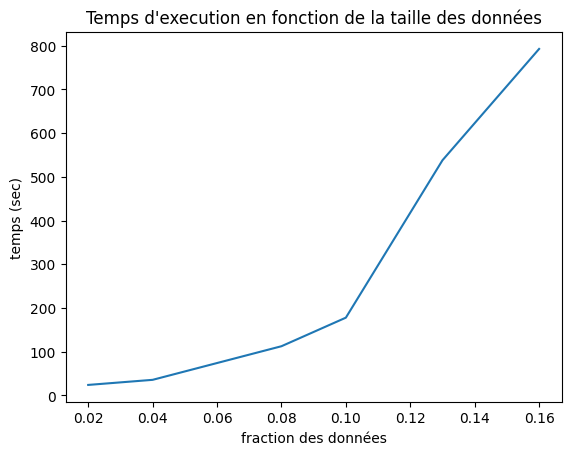

In [10]:
import matplotlib.pyplot as plt

plt.plot([0.02,0.04,0.08,0.1,0.13,0.16],[24.02399778366089,35.65785837173462,112.5030312538147, 177.83198046684265,537.7974755764008,792.3653001785278])
plt.xlabel("fraction des données")
plt.ylabel("temps (sec)")
plt.title("Temps d'execution en fonction de la taille des données")
plt.show()

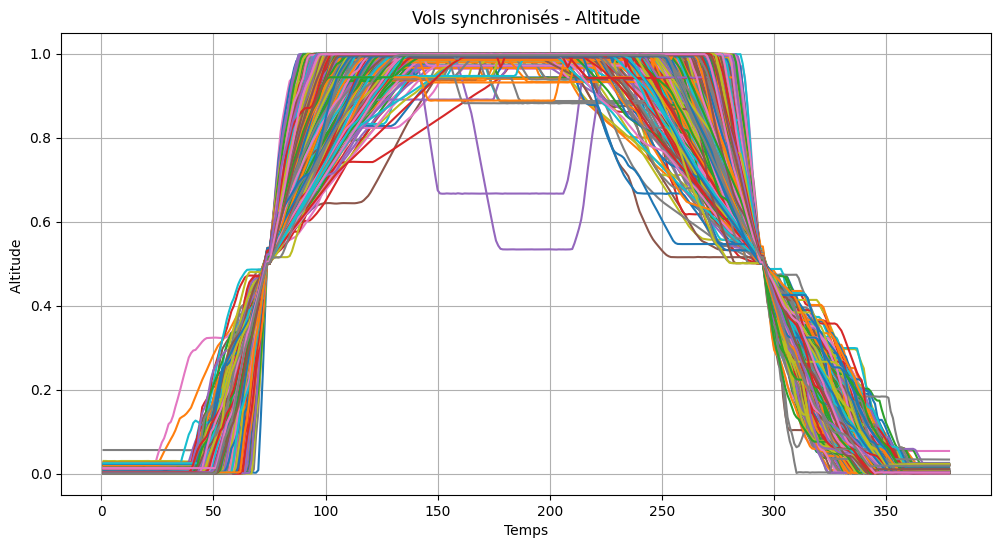

In [ ]:
sync_flights, A, B = synchronize_flights(ds_cleaned,method="ptrivial",n_points=2,subset_fraction=0.05,col="ALT_norm")

ALT = sync_flights["ALT_norm"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(ALT.columns):
    #print("Vol",i)
    plt.plot(np.arange(1, len(ALT) + 1), ALT[col])

plt.xlabel("Temps")
plt.ylabel("Altitude ")
plt.title("Vols synchronisés - Altitude")
plt.grid()
plt.show()

In [16]:
sync_flights_triv, A, B = synchronize_flights(ds_cleaned,method="trivial",n_points=20,subset_fraction=0.05,col="ALT_norm")
print(np.mean(sync_flights_triv['ALT_norm'].max(axis=1)-sync_flights_triv['ALT_norm'].min(axis=1)))
print(np.mean(sync_flights_triv['ALT_norm'].std(axis=1)))
print(np.mean(np.abs(sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))))
print(np.sqrt(np.mean((sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))**2)))

sync_flights_triv, A, B = synchronize_flights(ds_cleaned,method="ptrivial",n_points=20,subset_fraction=0.05,col="ALT_norm")
print(np.mean(sync_flights_triv['ALT_norm'].max(axis=1)-sync_flights_triv['ALT_norm'].min(axis=1)))
print(np.mean(sync_flights_triv['ALT_norm'].std(axis=1)))
print(np.mean(np.abs(sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))))
print(np.sqrt(np.mean((sync_flights_triv['ALT_norm'].sub(sync_flights_triv['ALT_norm'].mean(axis=1), axis=0))**2)))

0.8274415258759263
0.15272173325471802
0.11213293423199824
0.18433143240341324
0.3030456854516017
0.036788251206946204
0.02572731717471931
0.04726187703723553


In [20]:
sync_flights_rup, A, B = synchronize_flights(ds_cleaned,method="ruptures",n_points=30,subset_fraction=0.05,col="ALT_norm")
print(np.mean(sync_flights_rup['ALT_norm'].max(axis=1)-sync_flights_rup['ALT_norm'].min(axis=1)))
print(np.mean(sync_flights_rup['ALT_norm'].std(axis=1)))
print(np.mean(np.abs(sync_flights_rup['ALT_norm'].sub(sync_flights_rup['ALT_norm'].mean(axis=1), axis=0))))
print(np.sqrt(np.mean((sync_flights_rup['ALT_norm'].sub(sync_flights_rup['ALT_norm'].mean(axis=1), axis=0))**2)))

0.4212606676397127
0.06931682039757849
0.05457682243134501
0.0815733758544743


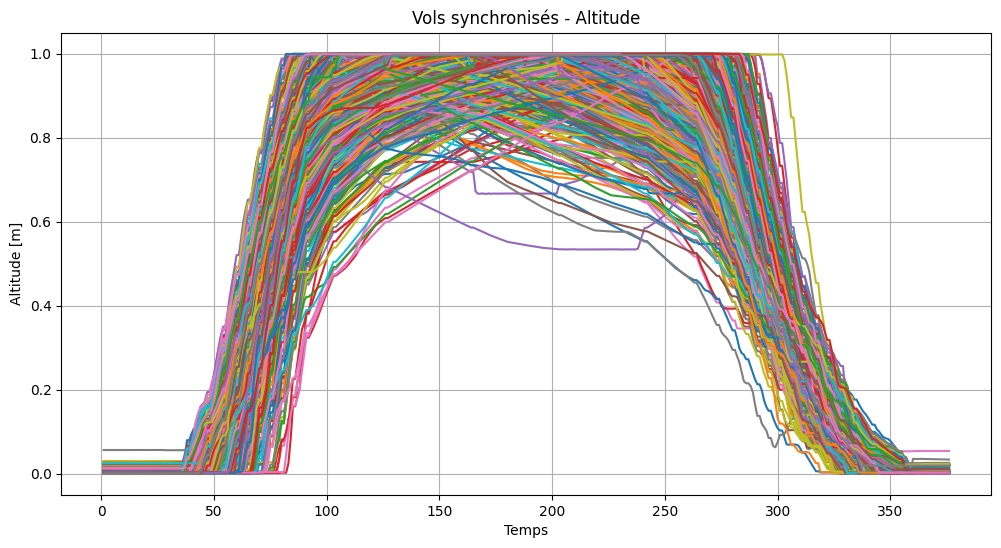

In [19]:
ALT = sync_flights_rup["ALT_norm"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(ALT.columns):
    #print("Vol",i)
    plt.plot(np.arange(1, len(ALT) + 1), ALT[col])

plt.xlabel("Temps")
plt.ylabel("Altitude [m]")
plt.title("Vols synchronisés - Altitude")
plt.grid()
plt.show()

In [ ]:
sync_flights["ALT"]["re"]